In [1481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope)
Source: The ST segment/heart rate slope as a predictor of coronary artery disease: comparison with quantitative thallium imaging and conventional ST segment criteria https://pubmed.ncbi.nlm.nih.gov/3739881/

Korzystając z biblioteki pandas, wczytaj plik heart disease dataset.csv do struktury DataFrame (jest to reprezentacja tabeli)

In [1482]:
# Opening heart_disease_dataset.csv using pandas library
heart_disease = pd.read_csv("heart_disease_dataset.csv")


### Zadanie 1. 
Oblicz podstawowe statystyki opisowe (średnia, mediana, odchylenie standardowe) dla kolumn'Age','Resting blood pressure','Serum cholesterol in mg/dl', 'Maximum heart rate achieved'.

In [1483]:
# Creating a subset DataFrame with Age, Resting blood pressure, Serum cholesterol in mg/dl, Maximum heart rate achieved columns

heart_disease_subset = heart_disease[['Age','Resting blood pressure','Serum cholesterol in mg/dl','Maximum heart rate achieved']]

In [1484]:
# Calculating basic statistics using describe() function and picking mean, median (50th percentile) and standard deviation using loc property

# Transposing basic_stats DataFrame for better readability using T function
basic_stats = heart_disease_subset.describe().loc[['mean', '50%', 'std']].T

# Rounding all values to .1 for better data readability
round(basic_stats,1)


,mean,50%,std
Age,54.4,56.0,9.1
Resting blood pressure,131.6,130.0,17.5
Serum cholesterol in mg/dl,246.0,240.0,51.6
Maximum heart rate achieved,149.1,152.0,23.0


In [1485]:
# Custom function to calculate basic stats
# It consumes less memory than describe() as it calculates less

def calculate_basic_stats(x):
    return pd.Series({
        'Mean': x.mean(),
        'Median': x.median(),
        'Standard Deviation': x.std()
    })

In [1486]:
heart_disease_subset2 = heart_disease[['Age','Resting blood pressure','Serum cholesterol in mg/dl','Maximum heart rate achieved']]

round(heart_disease_subset.agg(calculate_basic_stats),1).T

,Mean,Median,Standard Deviation
Age,54.4,56.0,9.1
Resting blood pressure,131.6,130.0,17.5
Serum cholesterol in mg/dl,246.0,240.0,51.6
Maximum heart rate achieved,149.1,152.0,23.0


#### Zadanie 2. 
Jaki jest rozkład płci w zestawie danych? Przedstaw go na wykresie kołowym.

In [1487]:
gender_distribution = heart_disease['Sex'].value_counts()
gender_distribution

Sex
male      713
female    312
Name: count, dtype: int64

Odpowiedź: W zestawie danych rozkład płci to 713 mężczyzn i 312 kobiet.

<Axes: ylabel='count'>

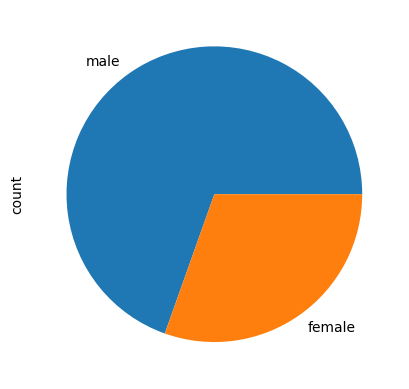

In [1488]:
gender_distribution.plot(kind="pie")

#### Zadanie 3. 
Czy (w analizowanej próbie) na choroby serca choruje więcej kobiet, czy mężczyzn?
O ile procent więcej?

In [1489]:
heart_disease_subset3 = heart_disease[['Sex','Disease']]
heart_disease_subset3

,Sex,Disease
0,male,False
1,male,False
2,male,False
3,male,False
4,female,False
...,...,...
1020,male,True
1021,male,False
1022,male,False
1023,female,True


In [1490]:
# Grouping the dataset by gender and calculating the value counts
counts_by_gender = heart_disease_subset3.groupby('Sex').value_counts()
counts_by_gender

Sex     Disease
female  True       226
        False       86
male    False      413
        True       300
Name: count, dtype: int64

In [1491]:
# Calculating the counts for women and men with the heart disease
num_women_with_heart_disease = counts_by_gender.get(('female', True), 0)
num_men_with_heart_disease = counts_by_gender.get(('male', True), 0)

# Calculating the percentage of patients who suffer more frequently from heart disease
counts_by_gender = heart_disease_subset3[heart_disease_subset3['Disease']].groupby('Sex').size()
print(counts_by_gender)

# Checking which gender suffers more frequently by returning index of the maximum element
more_frequently_suffering_gender = counts_by_gender.idxmax()

#Checking number of patients in more frequently suffering group
number_patients_more_suffering = counts_by_gender.max()
print(number_patients_more_suffering)

# Calculating a percentage difference between patients by gender
number_patients_with_heart_disease = counts_by_gender.sum()
print(number_patients_with_heart_disease)

difference_by_gender = (number_patients_more_suffering / number_patients_with_heart_disease) * 100
print("There is {:.2f}% more ".format(difference_by_gender) + more_frequently_suffering_gender + " patients suffering from the heart disease in the analysed dataset.")


Sex
female    226
male      300
dtype: int64
300
526
There is 57.03% more male patients suffering from the heart disease in the analysed dataset.


#### Zadanie 4
Porównaj średnią wartość cholesterolu we krwi osobno dla grupy kobiet i grupy
mężczyzn w zależności od obecności choroby serca.

#### Zadanie 5
Narysuj wykres pudełkowy maksymalnej osiągniętej wartości tętna podczas testu
wysiłkowego w zależności od obecności choroby serca. Co można zauważyć na pod-
stawie tego wykresu?

In [1492]:
heart_disease_subset5 = heart_disease[['Maximum heart rate achieved','Disease']]
heart_disease_subset5

,Maximum heart rate achieved,Disease
0,168,False
1,155,False
2,125,False
3,161,False
4,106,False
...,...,...
1020,164,True
1021,141,False
1022,118,False
1023,159,True
